# Extract bits of the demographic data

In [1]:
%matplotlib inline

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook, tqdm

DATA_SRC = Path('~/Data/').expanduser()
WEATHER_SRC = DATA_SRC / 'weather'
POP_DATA_SRC = DATA_SRC / 'lancet' / 'population'

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

In [3]:
POPULATION_FILE = POP_DATA_SRC / 'population_ismip_and_gpw4_era_compat.nc'
UN_DEMOGRAPHICS_FILE  = POP_DATA_SRC / 'UN' / 'WPP2019_PopulationByAgeSex_Medium.csv'

COUNTRY_ID_LOOKUP = DATA_SRC/ 'lancet/population/gpwv4/gpw_v4_national_identifier_lookup.txt'
COUNTRY_RASTER_FILES = DATA_SRC/ 'lancet/population/country_codes_30min_era_compat.nc'

In [20]:
COUNTRIES_RASTER = xr.open_dataarray(COUNTRY_RASTER_FILES).load()

COUNTRIES_LOOKUP = pd.read_csv(COUNTRY_ID_LOOKUP,sep='\t')

In [10]:
demo = xr.open_dataarray(POP_DATA_SRC / 'demographics_1950_2020.nc')

In [11]:
demo

<xarray.DataArray 'demographic_totals' (latitude: 290, longitude: 720, age_band_lower_bound: 14, year: 71)>
[207547200 values with dtype=float64]
Coordinates:
  * latitude              (latitude) float64 85.0 84.5 84.0 ... -59.0 -59.5
  * year                  (year) int64 1950 1951 1952 1953 ... 2018 2019 2020
  * longitude             (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
  * age_band_lower_bound  (age_band_lower_bound) int64 0 5 10 15 ... 50 55 60 65

In [12]:
demo_pct = xr.open_dataarray(POP_DATA_SRC / 'demographics_pct_1950_2050.nc')

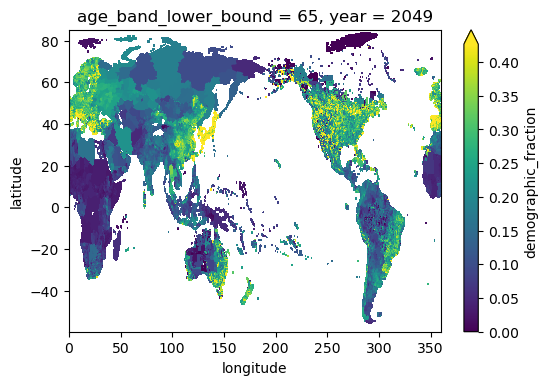

In [14]:
demo_pct.sel(year=2049, age_band_lower_bound=65).plot(robust=True)

## Clip the countries raster to match the demographic data


In [21]:
countries_grid = COUNTRIES_RASTER.sel(latitude=demo.latitude)

In [22]:
countries_grid

<xarray.DataArray 'country_codes' (latitude: 290, longitude: 720)>
array([[32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       ...,
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767]], dtype=int16)
Coordinates:
  * latitude   (latitude) float64 85.0 84.5 84.0 83.5 ... -58.5 -59.0 -59.5
  * longitude  (longitude) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
Attributes:
    transform:   [   0.5    0.  -180.     0.    -0.5   90. ]
    crs:         +init=epsg:4326
    res:         [0.5 0.5]
    is_tiled:    0
    nodatavals:  nan

In [28]:
grid_code = COUNTRIES_LOOKUP[COUNTRIES_LOOKUP.ISOCODE == 'CHN'].GRIDCODE.item()

In [29]:
grid_code

156

In [30]:
country_mask = countries_grid == grid_code

In [33]:
china_demo = demo.where(country_mask)

In [34]:
china_demo_pct = demo_pct.where(country_mask)

In [35]:
china_demo_pct

<xarray.DataArray 'demographic_fraction' (latitude: 290, longitude: 720, age_band_lower_bound: 14, year: 100)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, 